###  print out structures

In [1]:
import random
import numpy as np
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP, MLP_linear
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)

#### Multi Layer Perceptron

neuron nonlin is  False
neuron nonlin is  False
neuron nonlin is  False
inputs  [Value(name=val8,type=i,data=4, grad=0)]
number of Value objects created =  16


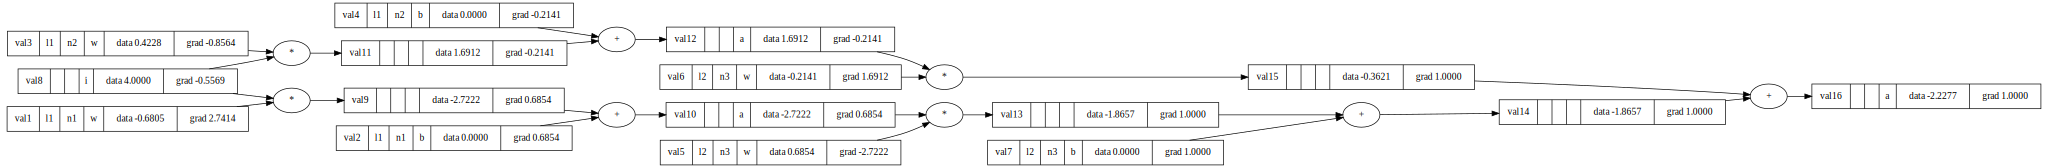

In [9]:
# initialize a model 
nin=1  #number of inputs
Value.value_counter=0
Neuron.neuron_counter=0
Layer.layer_counter =0

# model = MLP_linear(nin, [2, 2, 1]) # 2-layer neural network
model = MLP_linear(nin, [2,  1]) # 1-layer neural network
xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xi = [Value(x,type='i') for x in xinumbers]
print("inputs ", xi)

activation = model(xi)
activation.backward()

print("number of Value objects created = ",Value.value_counter)

draw_dot(activation, debug_print_01=False)

In [3]:
# loss function single MLP
def loss_single(target,output):
    total_loss = (output - target)
    return total_loss

neuron nonlin is  False
neuron nonlin is  False
neuron nonlin is  False
neuron nonlin is  False
neuron nonlin is  False
neuron nonlin is  False
neuron nonlin is  False
neuron nonlin is  False
neuron nonlin is  False
inputs  [Value(name=val42,type=i,data=5, grad=0), Value(name=val43,type=i,data=9, grad=0), Value(name=val44,type=i,data=9, grad=0)]
loss=  Value(name=val112,type=,data=20.73179222262169, grad=1)
number of Value objects created =  112


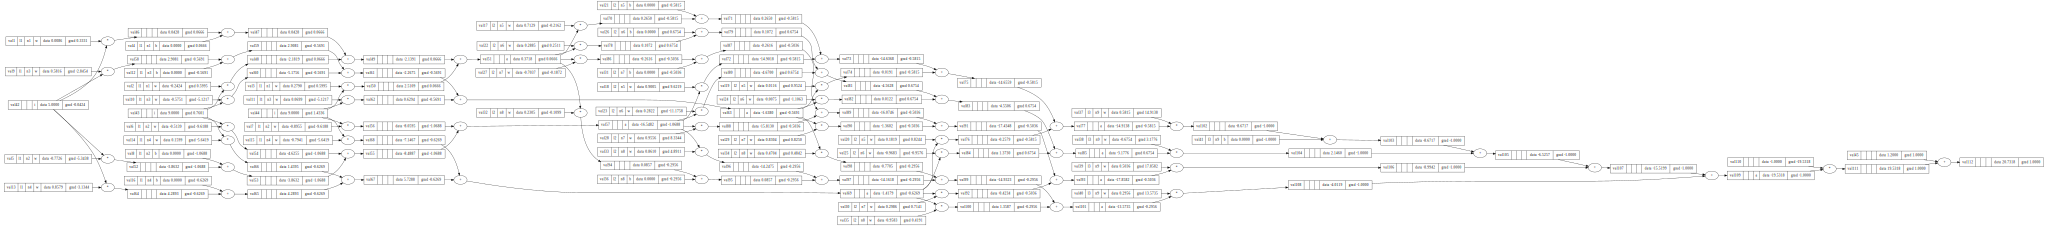

In [11]:
# initialize a model 
nin=3  #number of inputs
Value.value_counter=0
Neuron.neuron_counter=0
Layer.layer_counter =0

model = MLP_linear(nin, [4, 4, 1]) # 2-layer neural network
xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xi = [Value(x,type='i') for x in xinumbers]
print("inputs ", xi)


#ys = [[1.0]]  
ys=Value(1.2) # desired targets

ypred = model(xi)

loss=loss_single(ypred,ys)
loss.backward()
#loss=ypred
print("loss= ",loss)
print("number of Value objects created = ",Value.value_counter)

draw_dot(loss, debug_print_01=False)

#### Multiple Multi Layer Perceptrons

In [5]:
# loss function multiple MLP's
def loss_mult(targets,outputs):
    total_loss = sum((yout - ygt) ** 2 for ygt, yout in zip(outputs, targets))
    return total_loss


neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  False
[[3 5 9 7]
 [4 9 9 8]
 [5 4 3 2]]
Value(name=val306,type=,data=373.8498009435574, grad=0)
number of Value objects created =  306


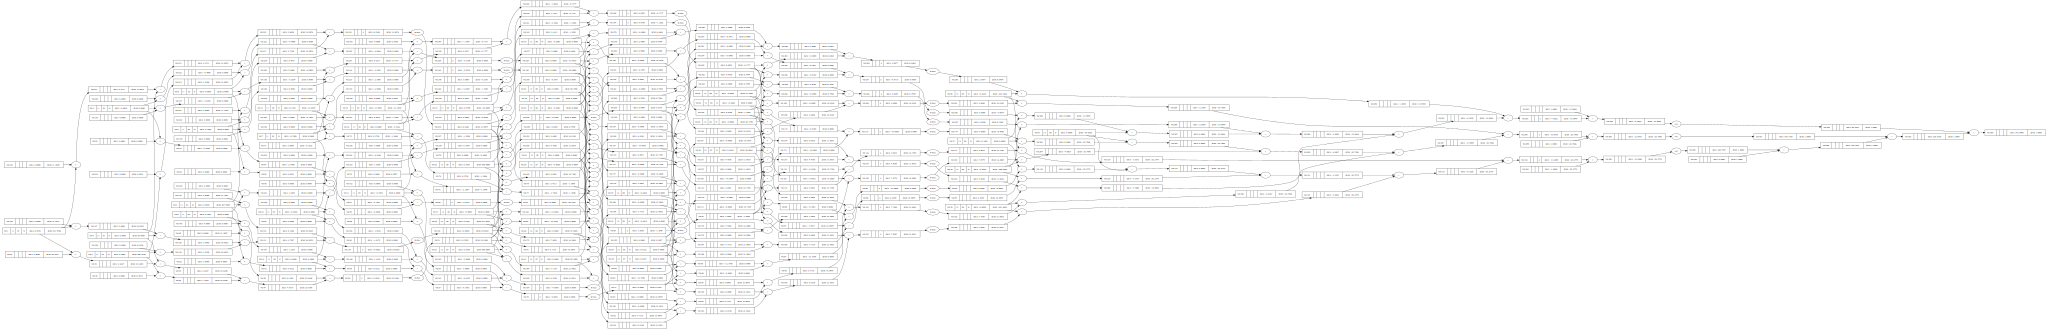

In [13]:
# initialize a model 
nin=3  #number of inputs
Value.value_counter=0
Neuron.neuron_counter=0
Layer.layer_counter =0

model = MLP(nin, [4, 4, 1]) # 2-layer neural network
xs2=np.random.randint(1,10, size=(3,4))   # inputs
print(xs2)

ypred = [model(x) for x in xs2]

ys = [1.0, -1.0, -1.0, 1.0]  # desired targets

loss=loss_mult(ypred,ys)
print(loss)
print("number of Value objects created = ",Value.value_counter)
loss.backward()

draw_dot(loss)